In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_curve,auc,RocCurveDisplay
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
import pickle
import warnings

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
train=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Data Exploration

In [3]:
ID=test.PassengerId.values
ID

array(['0013_01', '0018_01', '0019_01', ..., '9271_01', '9273_01',
       '9277_01'], dtype=object)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
corr=train.corr().abs()
corr.style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_23/376537110.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=train.corr().abs()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,0.075026
RoomService,0.068723,1.000000,0.015889,0.054480,0.010080,0.019581,0.244611
FoodCourt,0.130421,0.015889,1.000000,0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,0.014228,1.000000,0.013879,0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,0.221131
VRDeck,0.101007,0.019581,0.227995,0.007322,0.153821,1.000000,0.207075
Transported,0.075026,0.244611,0.046566,0.010141,0.221131,0.207075,1.000000


In [6]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


#### The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [8]:
def replacer(val):
    if type(val)==str and val.endswith('P'): return 'Port'
    elif type(val)==str and val.endswith('S'):return 'Starboard'
    else: return val
train.Cabin=train.Cabin.apply(replacer)
test.Cabin=train.Cabin.apply(replacer)
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,Port,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,Starboard,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,Starboard,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,Starboard,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,Starboard,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,Port,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,Starboard,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,Starboard,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,Starboard,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,Port,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [9]:
train.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [10]:
train.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [11]:
train.Cabin.value_counts()

Starboard    4288
Port         4206
Name: Cabin, dtype: int64

In [12]:
train.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [13]:
train.VIP.value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [14]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

#### Thera are some missing values.We fill dataset with most repeated values

In [15]:
def filling(data):
    data=data.drop(['PassengerId',],axis=1)
    cat_cols=[col for col in data.columns if data[col].dtype=='object']
    num_cols=[col for col in data.columns if data[col].dtype!='object' and col!='Transported']
    for col in cat_cols:
        data[col]=SimpleImputer(strategy='most_frequent').fit_transform(data[[col]])
    for col in num_cols:
        if col!='Age':
            data[col]=SimpleImputer(strategy='most_frequent').fit_transform(data[[col]])
        else:
            data[col].fillna(np.round(train.groupby('VIP').Age.transform('mean')),inplace=True)
    return  data 
train=filling(train)
test=filling(test)

In [16]:
train.fillna(28,inplace=True)
train.Name=LabelEncoder().fit_transform(train.Name)
test.Name=LabelEncoder().fit_transform(test.Name)
test

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,Earth,True,Port,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,2912
1,Earth,False,Starboard,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,2406
2,Europa,True,Starboard,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,3376
3,Europa,False,Starboard,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,2711
4,Earth,False,Starboard,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,668
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,Starboard,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,2105
4273,Earth,False,Starboard,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,2654
4274,Mars,True,Port,55 Cancri e,29.0,False,0.0,0.0,0.0,0.0,0.0,2085
4275,Europa,False,Port,TRAPPIST-1e,37.0,False,0.0,2680.0,0.0,0.0,523.0,2327


#### Using an analytical approach, we can add additional columns

In [17]:
def add_data(df):
    df['Room_Food']=df['RoomService']-df['FoodCourt']
    df['Shopping_Food']=df['ShoppingMall']-df['FoodCourt']
    df['ShoppingMall_Spa']=df['ShoppingMall']-df['Spa']
    df['Total_Amount']=df['RoomService']+df['FoodCourt']+df['ShoppingMall']+df['Spa']+df['VRDeck']
    df['Mean_amount']=(df['RoomService']+df['FoodCourt']+df['ShoppingMall']+df['Spa']+df['VRDeck'])/5
    return df
train=add_data(train)
test=add_data(test)

In [18]:
corr=train.corr().abs()
corr.style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_23/376537110.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=train.corr().abs()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Room_Food,Shopping_Food,ShoppingMall_Spa,Total_Amount,Mean_amount
Age,1.000000,0.068538,0.127326,0.032782,0.121074,0.099531,0.011039,0.074312,0.090949,0.107243,0.092096,0.184520,0.184520
RoomService,0.068538,1.000000,0.015126,0.052337,0.009244,0.018624,0.018396,0.241124,0.394321,0.032384,0.016492,0.234374,0.234374
FoodCourt,0.127326,0.015126,1.000000,0.013717,0.221468,0.224572,0.020027,0.045583,0.924832,0.937009,0.203242,0.742608,0.742608
ShoppingMall,0.032782,0.052337,0.013717,1.000000,0.014542,0.007849,0.017426,0.009391,0.032517,0.362126,0.459120,0.220529,0.220529
Spa,0.121074,0.009244,0.221468,0.014542,1.000000,0.147658,0.027205,0.218545,0.200029,0.201376,0.881604,0.592656,0.592656
VRDeck,0.099531,0.018624,0.224572,0.007849,0.147658,1.000000,0.024584,0.204874,0.213484,0.212092,0.134894,0.585684,0.585684
Name,0.011039,0.018396,0.020027,0.017426,0.027205,0.024584,1.000000,0.008598,0.025405,0.012582,0.015945,0.031655,0.031655
Transported,0.074312,0.241124,0.045583,0.009391,0.218545,0.204874,0.008598,1.000000,0.133623,0.039213,0.198603,0.199514,0.199514
Room_Food,0.090949,0.394321,0.924832,0.032517,0.200029,0.213484,0.025405,0.133623,1.000000,0.873504,0.193069,0.593355,0.593355
Shopping_Food,0.107243,0.032384,0.937009,0.362126,0.201376,0.212092,0.012582,0.039213,0.873504,1.000000,0.349854,0.615232,0.615232


## Data Exploration through Graphs

In [19]:
def facetGrid(col,x,type_plot):
    if col and x in train.columns:
        facet=sns.FacetGrid(data=train,col=col,hue='Transported',aspect=1.5,palette='Set1')
        facet.map(type_plot,x,fill=True)
        facet.set(xlim=(0,train[x].max()))
        facet.add_legend()
        plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


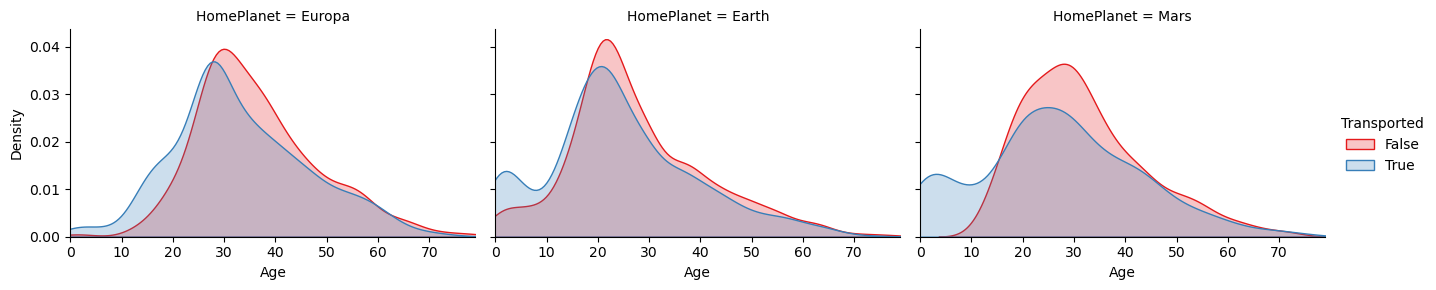

None


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


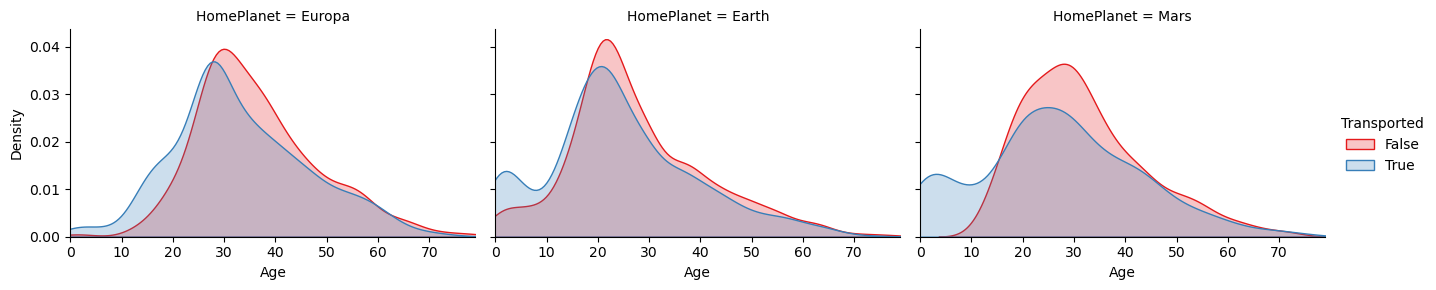

None


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


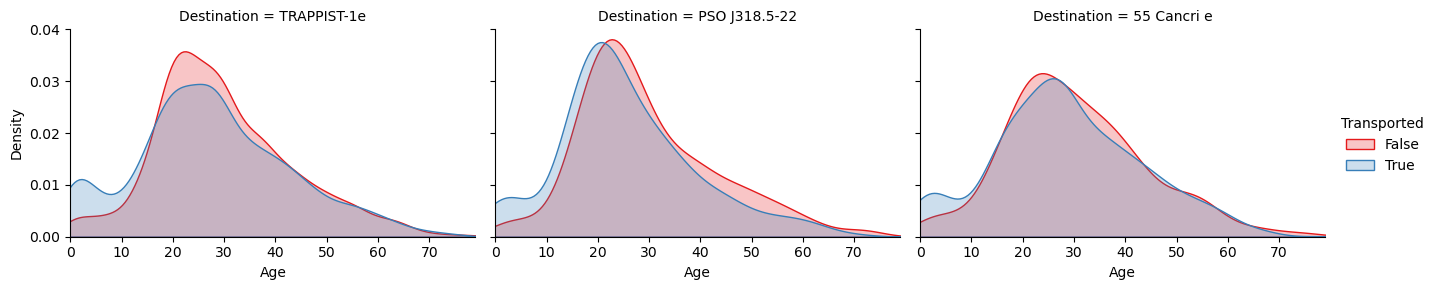

None


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


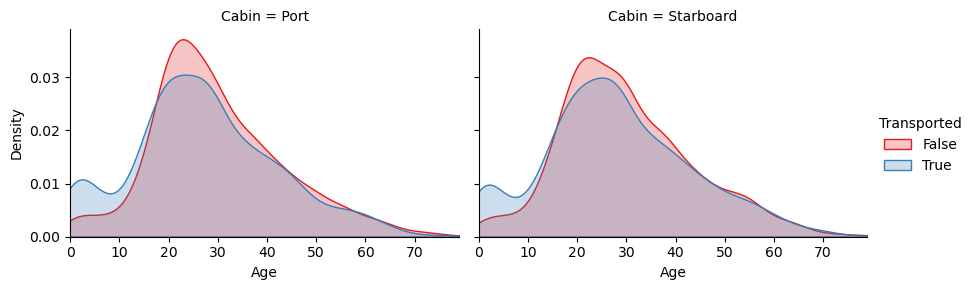

None


<Figure size 640x480 with 0 Axes>

In [20]:
print(facetGrid('HomePlanet','Age',sns.kdeplot))
print(facetGrid('HomePlanet','Age',sns.kdeplot))
print(facetGrid('Destination','Age',sns.kdeplot))
print(facetGrid('Cabin','Age',sns.kdeplot))
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")
plt.tight_layout()

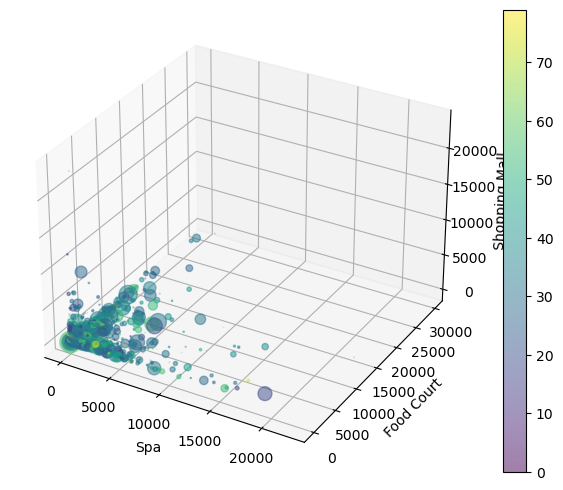

In [21]:
#%matplotlib notebook
plt.figure(figsize=(8,6))
ax=plt.axes(projection='3d')
fig=ax.scatter3D(train['Spa'],train['FoodCourt'],train['ShoppingMall'],
                s=train['VRDeck']/100,c=train['Age'],alpha=0.5)
ax.set_xlabel('Spa')
ax.set_ylabel('Food Court')
ax.set_zlabel('Shopping Mall')
plt.colorbar(fig)
plt.show()

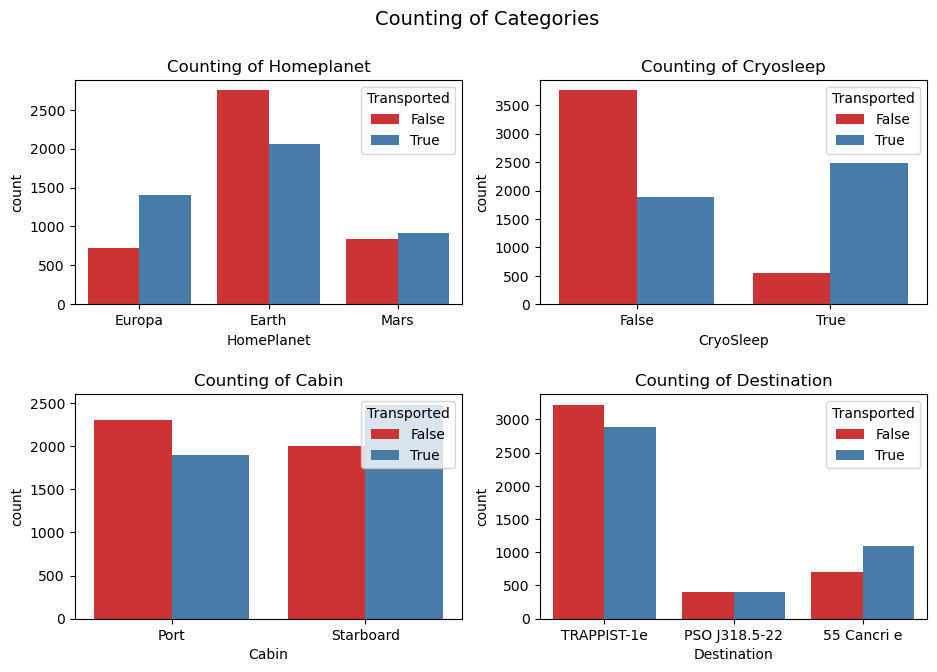

In [22]:
fig,ax=plt.subplots(2,2,figsize=(11,7))
fig.suptitle('Counting of Categories',fontsize=14)
fig.subplots_adjust(hspace=0.4)
axes=[ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
categories=['HomePlanet','CryoSleep','Cabin','Destination']
for cat in categories:
    sns.countplot(ax=axes[categories.index(cat)],data=train,x=cat,
                  hue='Transported',palette='Set1')
    axes[categories.index(cat)].set_title(f"Counting of {cat.title()}")

In [23]:
repl={True: 1, False: 0}
train['Transported'] = train['Transported'].replace(repl)
#train['VIP'] = train['Transported'].replace(repl)
#train['CryoSleep'] = train['CryoSleep'].replace(repl)
#train.corrwith(train.Transported).abs().sort_values(ascending=False) #Age,FoodCourt,ShoppingMall

# Data Preprocessing

In [24]:
train_X=train.drop('Transported',axis=1)
train_y=train['Transported']
test_X=test.copy()
train_X.corrwith(train_y).abs().sort_values()

/tmp/ipykernel_23/2993840670.py:4: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_X.corrwith(train_y).abs().sort_values()


Name                0.008598
ShoppingMall        0.009391
Shopping_Food       0.039213
FoodCourt           0.045583
Age                 0.074312
Room_Food           0.133623
ShoppingMall_Spa    0.198603
Mean_amount         0.199514
Total_Amount        0.199514
VRDeck              0.204874
Spa                 0.218545
RoomService         0.241124
dtype: float64

In [25]:
num_pipe=Pipeline([('standard',StandardScaler())])
num_cols=['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Name',
          'Total_Amount','Mean_amount','Room_Food','Shopping_Food','ShoppingMall_Spa']
cat_cols=['HomePlanet','CryoSleep','Cabin','Destination','VIP']
full_pipe=ColumnTransformer([('num',num_pipe,num_cols),
                             ('cat',OneHotEncoder(),cat_cols)])
train_X_prep=full_pipe.fit_transform(train_X)
test_X_prep=full_pipe.fit_transform(test_X)
test_X_prep[0]

array([-0.11912483, -0.35733908, -0.28383979, -0.31217285, -0.26784148,
       -0.24671194,  0.70873285, -0.5034252 , -0.5034252 ,  0.13001074,
        0.160089  ,  0.09940022,  1.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  1.        ,  0.        ])

In [26]:
#num_pipe=Pipeline([('standard',MinMaxScaler())])
#num_cols=['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
#cat_cols=['HomePlanet','CryoSleep','Cabin','Destination','VIP']
#train_X[num_cols]=num_pipe.fit_transform(train_X[num_cols])
#test_X[num_cols]=num_pipe.fit_transform(test_X[num_cols])
#for col in cat_cols:
 #   label=LabelEncoder()
  #  train_X[col]=label.fit_transform(train_X[col])
   # test_X[col]=label.fit_transform(test_X[col])

# Machine Learning

#### We use some classification algorithms to find which model work properly

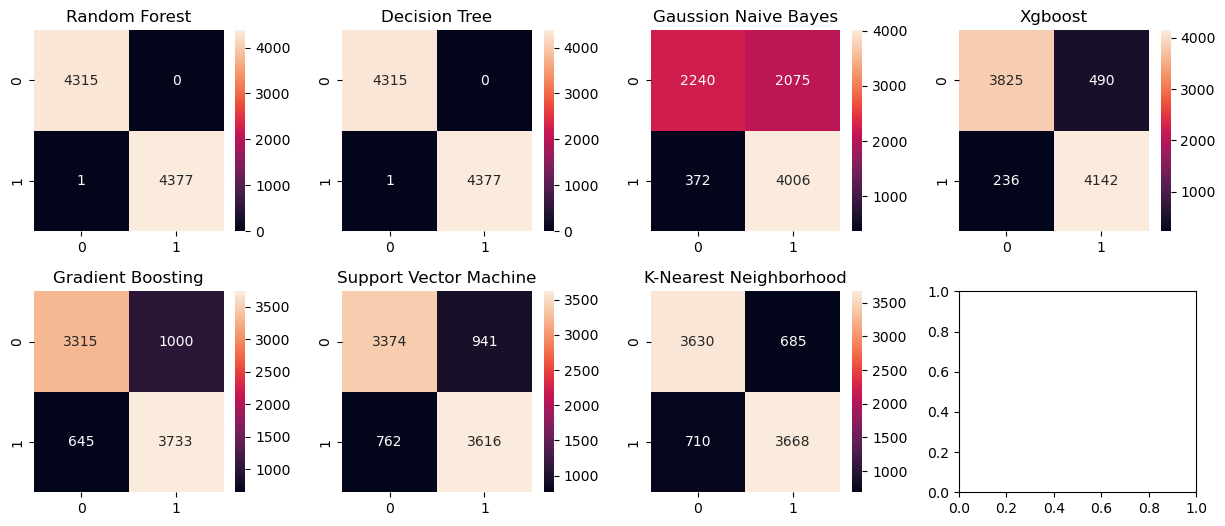

In [27]:
RF_model=RandomForestClassifier()
tree_model=DecisionTreeClassifier()
GB_model=GaussianNB()
XGB_model=XGBClassifier()
GBC_model=GradientBoostingClassifier()
SVC_model=SVC()
KNN_model=KNeighborsClassifier(n_neighbors=5)
model_names=[RF_model,tree_model,GB_model,XGB_model,GBC_model,SVC_model,KNN_model]
class ModelEvaluation:
    def __init__(self,model,train_X,train_y,test_X):
        self.model=model
        self.train_X=train_X
        self.train_y=train_y
        self.test_X=test_X
        
    def fit_transform(self):
        self.model.fit(self.train_X,self.train_y)
        predict_train=self.model.predict(self.train_X)
        predict=self.model.predict(self.test_X)
        return predict_train
    
    def report(self):
        predict=self.fit_transform()
        return classification_report(self.train_y,predict)
    
    def confMatrix(self):
        predict=self.fit_transform()
        return confusion_matrix(self.train_y,predict)

fig,ax=plt.subplots(2,4,figsize=(15,6))
fig.subplots_adjust(hspace=0.3,wspace=0.3)
axes=[ax[0,0],ax[0,1],ax[0,2],ax[0,3],ax[1,0],ax[1,1],ax[1,2],ax[1,3]]
model_title=['Random Forest','Decision Tree','Gaussion Naive Bayes',
             'Xgboost','Gradient Boosting','Support Vector Machine','K-Nearest Neighborhood']
for model_n in model_names:
    model=ModelEvaluation(model_n,train_X_prep,train_y,test_X_prep)
    ax=axes[model_names.index(model_n)]
    sns.heatmap(ax=ax,data=model.confMatrix(),
                cmap='rocket',annot=True,fmt='d')
    ax.set_title(f"{model_title[model_names.index(model_n)]}")

#### Let's tuning Decision tree model

0.8621879673300357


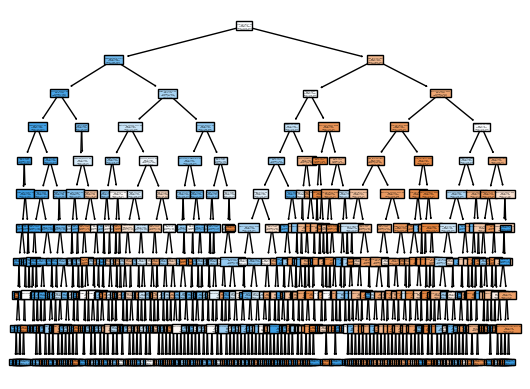

In [28]:
tree_model=DecisionTreeClassifier(max_depth=10)
train_tree_prep=pd.get_dummies(train_X,columns=cat_cols)
for col in num_cols:
    train_tree_prep[col]=MinMaxScaler().fit_transform(train_tree_prep[[col]])
tree_model.fit(train_tree_prep,train_y)
pred_train=tree_model.predict(train_tree_prep)
cols=train_tree_prep.columns
train1=train.replace([0,1],['True','False'])
classes=train1.Transported.unique()
plot_tree(tree_model,feature_names=cols,class_names=classes,filled=True)
print(accuracy_score(pred_train,train_y))
plt.show()

#### I also want to see roc curve of knn and Random forest

0.8679397216150926


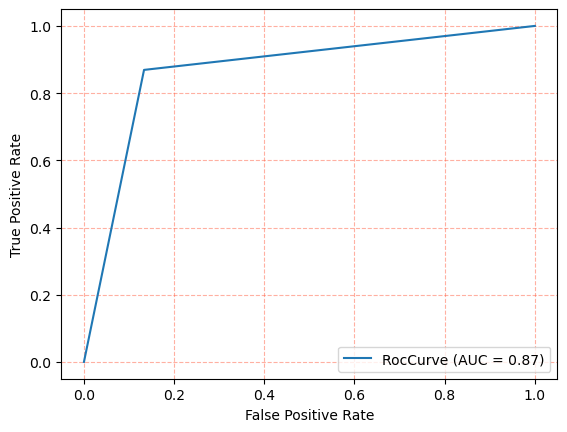

In [29]:
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(train_X_prep,train_y)
predict_knn=KNN.predict(train_X_prep)
print(accuracy_score(train_y,predict_knn))
fpr,tpr,thresholds=roc_curve(train_y,predict_knn)
roc_auc=auc(fpr,tpr)
display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='RocCurve')
display.plot()
plt.grid(color='tomato',linestyle='--',alpha=0.5)
plt.show()

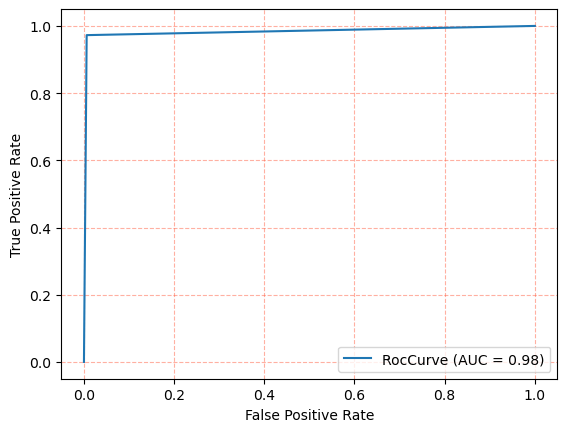

In [30]:
RF=RandomForestClassifier(n_estimators=10,random_state=23)
RF.fit(train_X_prep,train_y)
predict_rf=RF.predict(train_X_prep)
accuracy_score(predict_rf,train_y)
fpr,tpr,thresholds=roc_curve(train_y,predict_rf)
roc_auc=auc(fpr,tpr)
display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='RocCurve')
display.plot()
plt.grid(color='tomato',linestyle='--',alpha=0.5)
plt.show()

#### It is true that random forest more accurate compared with knn,but it may be overfitting

In [31]:
predict=RF.predict(test_X_prep)
predict

array([1, 0, 1, ..., 1, 1, 1])

### Now I use Deep Learning for classification.Because,I see that many time  deep learning give better result

In [32]:
tf_model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(24,),activation='relu'),
    
    keras.layers.Dense(1,activation='sigmoid')
])
tf_model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss=BinaryCrossentropy(from_logits=True),
            metrics=['accuracy']
            )
tf_model.fit(train_X_prep,train_y,epochs=500)

Epoch 1/500


/opt/conda/lib/python3.10/site-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


272/272 [==============================] - 6s 3ms/step - loss: 0.4874 - accuracy: 0.7650
Epoch 2/500
272/272 [==============================] - 1s 3ms/step - loss: 0.4359 - accuracy: 0.7955
Epoch 3/500
272/272 [==============================] - 1s 3ms/step - loss: 0.4296 - accuracy: 0.7972
Epoch 4/500
272/272 [==============================] - 1s 3ms/step - loss: 0.4264 - accuracy: 0.7962
Epoch 5/500
272/272 [==============================] - 1s 3ms/step - loss: 0.4250 - accuracy: 0.7983
Epoch 6/500
272/272 [==============================] - 1s 3ms/step - loss: 0.4226 - accuracy: 0.7991
Epoch 7/500
272/272 [==============================] - 1s 3ms/step - loss: 0.4223 - accuracy: 0.7987
Epoch 8/500
272/272 [==============================] - 1s 3ms/step - loss: 0.4198 - accuracy: 0.8000
Epoch 9/500
272/272 [==============================] - 1s 4ms/step - loss: 0.4189 - accuracy: 0.8000
Epoch 10/500
272/272 [==============================] - 1s 3ms/step - loss: 0.4177 - accuracy: 0.8018
E

In [33]:
predict_tf=tf_model.predict(test_X_prep)
predict_tf=np.concatenate(np.where(predict_tf<0.5,0,1))

134/134 [==============================] - 0s 2ms/step


In [34]:
data={'PassengerId':ID,'Transported':predict_tf}
result=pd.DataFrame(data)
result.replace({0:False,1:True},inplace=True)
result.to_csv('Submission_titanic.csv',index=False)

In [35]:
result

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


### Conclusion:These models returned different results for the train set. But for the test set, the accuracy is almost the same. Around 73-78%

In [36]:
best_models=[tree_model,KNN,RF,tf_model]
file_names=['decision_tree.pkl','knn_model.pkl','random_forest.pkl','tensorflow_model.pkl']
for file_name in file_names:
    ind=file_names.index(file_name)
    with open(file_name,'wb') as file:
        pickle.dump(best_models[ind],file)